In [1]:
# Importamos Librerias para vizualizacion de datos.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
sns.set()

## Descripción de la base.

| Variable    | Description                                                                                                                                          |
| ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| id    | (poner informacion)                                                                                      |
| semana         | Semanas desde la 1-53                                                                                                                                    |
| edad      | Edades generales.
                    |
| uni_med    | 0= No aplica, 1=Años, 2=Meses, 3=Días, 4=Horas, 5=Minutos SD=Sin informacion                                                                                                             |
| sexo      | M=Masculino, F=Femenino, SD=Sin informacion 
                        |
| nombre_barrio        | Texto asociado a la tabla de barrios definidos por la entidad territorial.  
                        |
| comuna    | Texto asociado a la tabla de comunas definidas por la entidad territorial.                                                                                                       |
| tipo_ss      | C= Contributivo, S=Subsidiado, P=Excepción, E=Especial, N= No asegurado, I= Indeterminado/Pendiente, SD=Sin informacion.                                                                                                            |
| cod_Ase      | Texto de 6 dígitos                                                                                                                 |
| fec_con    | DD/MM/AAAA (Día, Mes, Año). (string)                                                                                               |
| ini_sin | DD/MM/AAAA (Día, Mes, Año). (formato fecha)                                                                                                            |
| tip_cas        | 1=Sospechoso, 2= Probable,3=Confirmado por laboratorio, 4=Confirmado por clinica ,5= Confirmado por nexo epidemiológico                                                                                                                      |
| pac_hos        | 1= Si 2= No                                                                                                                      |
| evento        | Texto asociado a los eventos notificados.                                                                                                                      |
| year        | Texto asociado al año de notificación                                                                                                                    |

In [2]:
# lectura de archivos en formato DataFrame
file = pd.read_csv("intoxicacion_por_sustancias_psicoactivas.csv",';')
file.head(3)

,id,semana,edad_,uni_med_,sexo_,nombre_barrio,comuna,tipo_ss_,cod_ase_,fec_con_,ini_sin_,tip_cas_,pac_hos_,evento,year_
0,87355,46,32,1,M,El Poblado,El Poblado,C,EPS005,2010-11-20,2010-11-20,4,2,INTOXICACION POR SUSTANCIAS PSICOACTIVAS,2010
1,87356,46,36,1,F,SIN INFORMACION,SIN INFORMACION,C,EPS013,2010-11-16,2010-11-16,4,1,INTOXICACION POR SUSTANCIAS PSICOACTIVAS,2010
2,87357,46,17,1,F,Campo Valdes No.2,Manrique,C,5000,2010-11-19,2010-11-18,4,2,INTOXICACION POR SUSTANCIAS PSICOACTIVAS,2010


In [3]:
#Conocemos su cantidad de filas y el nombre de las columnas.
print(file.index)
print(file.columns)
print(file.shape)

RangeIndex(start=0, stop=5338, step=1)
Index(['id', 'semana', 'edad_', 'uni_med_', 'sexo_', 'nombre_barrio', 'comuna',
       'tipo_ss_', 'cod_ase_', 'fec_con_', 'ini_sin_', 'tip_cas_', 'pac_hos_',
       'evento', 'year_'],
      dtype='object')
(5338, 15)


In [4]:
# Eliminamos una barra de guión la cual estaba al final de cada nombre de los nombres de las columnas.
file.rename(columns=lambda s:s.strip('_'),inplace=True)
#file.head(3)

In [5]:
# Nuestros indices serán los id para un mejor control de la base.
file.index=file["id"].values
#file.head(3)

In [6]:
# Eliminamos la columna id ya que tenemos nuestros indices.
file.drop(['id'], axis=1).head(3)

,semana,edad,uni_med,sexo,nombre_barrio,comuna,tipo_ss,cod_ase,fec_con,ini_sin,tip_cas,pac_hos,evento,year
87355,46,32,1,M,El Poblado,El Poblado,C,EPS005,2010-11-20,2010-11-20,4,2,INTOXICACION POR SUSTANCIAS PSICOACTIVAS,2010
87356,46,36,1,F,SIN INFORMACION,SIN INFORMACION,C,EPS013,2010-11-16,2010-11-16,4,1,INTOXICACION POR SUSTANCIAS PSICOACTIVAS,2010
87357,46,17,1,F,Campo Valdes No.2,Manrique,C,5000,2010-11-19,2010-11-18,4,2,INTOXICACION POR SUSTANCIAS PSICOACTIVAS,2010


In [7]:
# Encontrar correlacion entre sexo y barrios.
file[['sexo','nombre_barrio']]

,sexo,nombre_barrio
87355,M,El Poblado
87356,F,SIN INFORMACION
87357,F,Campo Valdes No.2
87379,F,Los Angeles
87397,F,SIN INFORMACION
...,...,...
119676,M,Andalucía
119681,F,Trinidad
119686,M,Laureles
119707,M,La América


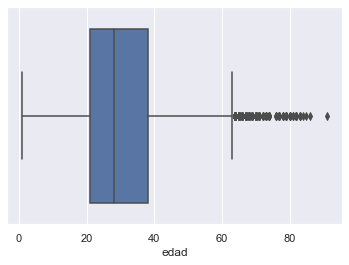

In [8]:
# Diagrama de cajas y bigotes con respecto a la edad, datos promedio [20,40]
sns.boxplot(file['edad'])

[Text(0, 0.5, 'Frecuencia'), Text(0.5, 0, 'Distribution normal')]

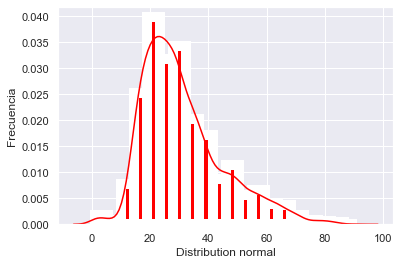

In [9]:
Distri = sns.distplot(file['edad'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 10,'alpha':1})
Distri.set(xlabel='Distribution normal', ylabel='Frecuencia')

In [10]:
#Existe significancia de genero con respecto al año?
scipy.stats.ttest_ind(file[file['sexo'] == 'F']['year'],
                        file[file['sexo'] == 'M']['year'], equal_var = True)


Ttest_indResult(statistic=3.009533547909345, pvalue=0.002628721625143908)

In [11]:
# existe significancia de genero con respecto a la comuna?
Comunas_mujeres = pd.DataFrame(file[file['sexo'] == 'F']['comuna'])
Comunas_hombres = pd.DataFrame(file[file['sexo'] == 'M']['comuna'])
Comunas_mujeres

,comuna
87356,SIN INFORMACION
87357,Manrique
87379,La Candelaria
87397,SIN INFORMACION
87807,Robledo
...,...
119337,Manrique
119449,Robledo
119629,Villa Hermosa
119681,Guayabal


In [12]:
Arreglo1 = Comunas_mujeres['comuna'].value_counts()
Arreglo2 = Comunas_hombres['comuna'].value_counts()
Vizualization1 = pd.DataFrame(Comunas_mujeres['comuna'].value_counts())
Vizualization2 = pd.DataFrame(Comunas_hombres['comuna'].value_counts())
A=list(Vizualization1.index)
B=list(Vizualization2.index)

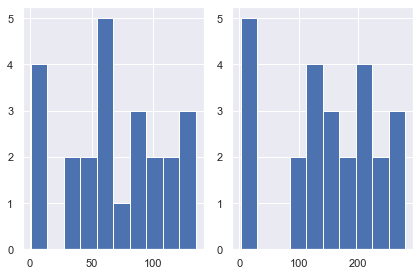

In [13]:
plt.subplot(1,2,1)
plt.hist(Arreglo1)

plt.subplot(1,2,2)
plt.hist(Arreglo2)

plt.tight_layout()
plt.show()

<ipython-input-14-1ead2a3467fa>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)


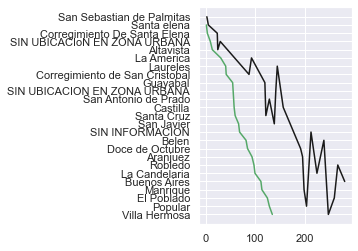

In [14]:
plt.subplot(1,2,1)
plt.plot(Arreglo1,A,'g')

plt.subplot(1,2,1)
plt.plot(Arreglo2,B,'k')

#Grafico verde mujeres, grafico negro hombres.
plt.show()

---

Veamos la proporción total de personas intoxicadas separadas por su género:

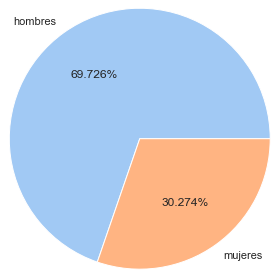

In [15]:
# Proporcion total de hombres y mujeres intoxicados registrados

datapie = [len(file[file['sexo'] == 'M']), len(file[file['sexo'] == 'F'])]
labels = ['hombres', 'mujeres']
colors = sns.color_palette('pastel')[0:2]
plt.pie(datapie, labels=labels, colors=colors, autopct='%.3f%%', radius=1.5); plt.show()

Una breve descripción de los datos estadísticos de interés sobre la edad de la población es:

In [16]:
# Resumen estadistico de las edades de los intoxicados
file['edad'].describe()

count    5338.000000
mean       31.091795
std        13.888775
min         1.000000
25%        21.000000
50%        28.000000
75%        38.000000
max        91.000000
Name: edad, dtype: float64

---

* Para poder diferenciar los rangos de edad para cada año de las personas que han sufrido intoxicación por consumo de sustancias psicoactivas se tiene el siguiente gráfico:

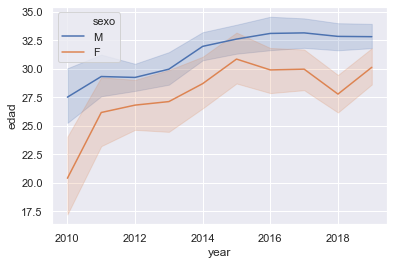

In [17]:
# Densidad de edad entre hombres y mujeres intoxicados para cada año
#sns.set_theme()
sns.lineplot(data=file, x="year", y="edad", hue='sexo')

Se ha encontrado en general un mayor rango de edades entre las mujeres que han sufrido este tipo de intoxicación presentando una mayor diferencia de edad hacia el año 2012. Por otro lado, la población masculina presenta en general un menor rango de edades para cada año, presentando edades que no se alejan tanto de la media.

La linea central representa la estimación de la media, las bandas inferior y superior son el intervalo de confianza para la media, con un 95% de confianza.

---

* Veamos ahora la cantidad de hombres y mujeres intoxicados cada año, visualizaremos el aumento o disminución de los casos para cada año:

In [18]:
years = []; years_r = []; sexo = []; cantidad = []

for y in file['year']:
    if years_r.count(y) < 2:
        years_r.append(y)
    if y not in years:
        years.append(y)
        sexo.append('M')
        sexo.append('F')

for y1 in years:
    cantidad.append(len(file[(file['year'] == y1) & (file['sexo'] == 'M')]))
    cantidad.append(len(file[(file['year'] == y1) & (file['sexo'] == 'F')]))

In [19]:
dataMF = {'year':years_r, 'sexo':sexo, 'cantidad':cantidad}
df_dataMF = pd.DataFrame(dataMF)
df_dataMF

,year,sexo,cantidad
0,2010,M,84
1,2010,F,23
2,2011,M,158
3,2011,F,67
4,2012,M,326
5,2012,F,117
6,2013,M,247
7,2013,F,82
8,2014,M,439
9,2014,F,176


Text(0.5, 1.0, 'cantidad de intoxicados por año')

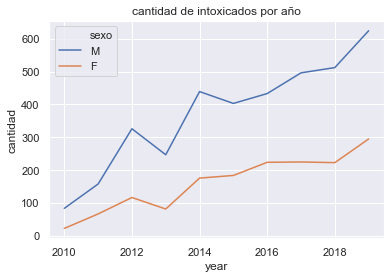

In [20]:
sns.lineplot(data=df_dataMF, x="year", y="cantidad", hue='sexo'); plt.title('cantidad de intoxicados por año')

Vemos que los registros de intoxicaciones presentan un aumento respecto a los años anteriores, teniendo únicamente un decrecimiento considerable hacia el año 2013.

---

* Veamos la densidad de casos discretizada por sexo y edad, para la concentración hacia el 50% de registros que se tienen de los casos:

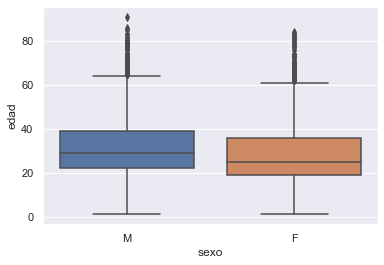

In [21]:
sns.boxplot(x='sexo', y='edad', data=file)

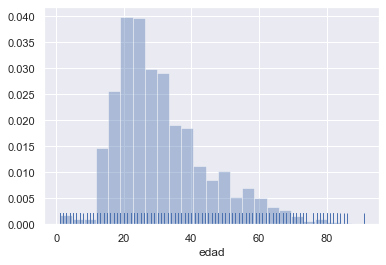

In [22]:
sns.distplot(file['edad'], bins = 25, hist=True, kde=False, rug=True, norm_hist=True)

sns.pairplot(file, hue = 'sexo')

In [23]:
file[["tip_cas","comuna"]]

,tip_cas,comuna
87355,4,El Poblado
87356,4,SIN INFORMACION
87357,4,Manrique
87379,4,La Candelaria
87397,4,SIN INFORMACION
...,...,...
119676,4,Santa Cruz
119681,4,Guayabal
119686,4,Laureles
119707,4,La America


In [24]:
Tipo_No = list(file["tipo_ss"])
Tipo_Com = list(file["comuna"])
save_type=[]
save_comuna=[]
for i in range(len(Tipo_No)):
    if Tipo_No[i]=='N':
        save_type.append(Tipo_No[i])
        save_comuna.append(Tipo_Com[i])
        
Guardar_poblado_infectados=0
for k in range(len(Tipo_Com)):
    if Tipo_Com[k]=="El Poblado":
        Guardar_poblado_infectados+=1
Guardar_poblado_infectados

383

In [25]:
Dt_No= pd.DataFrame((save_type),columns=["No asegurado"])
Dt_No["Comuna"]=save_comuna
Enlistadas_las_comunas_sin_seguro = Dt_No["Comuna"].value_counts()
Enlistadas_las_comunas_sin_seguro

El Poblado                        88
SIN INFORMACION                   84
Buenos Aires                      69
Villa Hermosa                     62
Popular                           53
La Candelaria                     53
Manrique                          40
Robledo                           39
SIN UBICACION EN ZONA URBANA      39
Aranjuez                          34
Castilla                          31
Belen                             29
San Antonio de Prado              23
Doce de Octubre                   23
Santa Cruz                        21
Guayabal                          20
San Javier                        18
Laureles                          16
Corregimiento de San Cristobal    15
La America                        10
Corregimiento De Santa Elena       4
SIN UBICACIoN EN ZONA URBANA       3
Altavista                          1
Santa elena                        1
Name: Comuna, dtype: int64

In [26]:
proporcion_poblado = list(Enlistadas_las_comunas_sin_seguro)[0]/Guardar_poblado_infectados
proporcion_poblado
#El 22% de los infectados en el barrio más turistico de medellín y con mejor estrato no poseen un sistema de salud estable

0.2297650130548303

In [27]:
save_type2=[]
save_comuna2=[]
for h in range(len(Tipo_No)):
    if Tipo_No[h]=='C':
        save_type2.append(Tipo_No[h])
        save_comuna2.append(Tipo_Com[h])
        

In [28]:
Dt_con= pd.DataFrame((save_type2),columns=["Asegurado"])
Dt_con["Comuna"]=save_comuna2
Dt_con["Comuna"].value_counts()

# Asegurados con respecto a la comuna.

El Poblado                        250
Robledo                           238
Belen                             237
Buenos Aires                      192
La Candelaria                     174
Manrique                          161
Aranjuez                          160
Laureles                          154
Villa Hermosa                     152
Doce de Octubre                   144
San Javier                        122
Castilla                          122
Popular                           118
Guayabal                          114
SIN UBICACION EN ZONA URBANA      114
SIN INFORMACION                   107
San Antonio de Prado              100
La America                         89
Santa Cruz                         84
Corregimiento de San Cristobal     63
Altavista                          29
SIN UBICACIoN EN ZONA URBANA       27
Corregimiento De Santa Elena        8
Santa elena                         4
Name: Comuna, dtype: int64

In [29]:
Tipo_No = list(file["tipo_ss"])
Tipo_Com = list(file["comuna"])
save_type_poblado=[]
save_type_poblado_otros=[]
#save_poblado=[]
for i in range(len(Tipo_No)):
    if Tipo_Com[i]=="El Poblado":
        if (Tipo_No[i]=='N')or(Tipo_No[i]=="C"):
            save_type_poblado.append(Tipo_No[i])
            
for m in range(len(Tipo_No)):
    if Tipo_Com[m]=="El Poblado":
        if (Tipo_No[m]=='S')or(Tipo_No[m]=="P")or(Tipo_No[m]=="E")or(Tipo_No[m]=="I")or(Tipo_No[m]=="SD"):
            save_type_poblado_otros.append(Tipo_No[m])
Data_poblado = pd.DataFrame((save_type_poblado),columns=["Con o sin seguro"])
Data_poblado_otros= pd.DataFrame((save_type_poblado_otros),columns=["Otros"])
Data_poblado.shape 

(338, 1)

**Podemos notar que de los 383,  338 pertenecen al grupo Con seguro o sin seguro, teniendo así una mayor proporcion de personas aseguradas en medellín, a la vez que personas no aseguradas.**

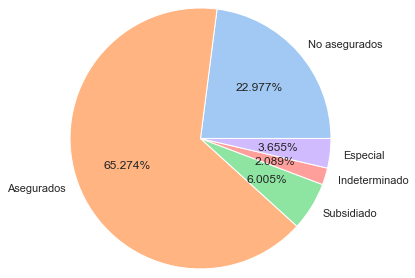

In [30]:
datapie_NO = [len(Data_poblado[Data_poblado['Con o sin seguro'] == 'N']), len(Data_poblado[Data_poblado['Con o sin seguro'] == 'C']),
              len(Data_poblado_otros[Data_poblado_otros["Otros"]=="S"]),
             len(Data_poblado_otros[Data_poblado_otros["Otros"]=="I"]),
             len(Data_poblado_otros[Data_poblado_otros["Otros"]=="E"])]
labels_NO = ['No asegurados', 'Asegurados',"Subsidiado","Indeterminado","Especial"]
colors_NO = sns.color_palette('pastel')[0:9]
plt.pie(datapie_NO, labels=labels_NO, colors=colors_NO, autopct='%.3f%%', radius=1.5)
plt.savefig('Porcentaje_ss_poblado', dpi=300,bbox_inches='tight')
plt.show()

In [31]:
Diciembre_Data = file[(file.semana >= 49) & (file.semana <= 53)]

Diciembre_Data[["edad","sexo"]]
Diciembre_Data["semana"]

87420     52
87470     52
87471     52
87472     52
87473     52
          ..
117963    52
117964    52
118090    51
119489    49
119629    52
Name: semana, Length: 521, dtype: int64

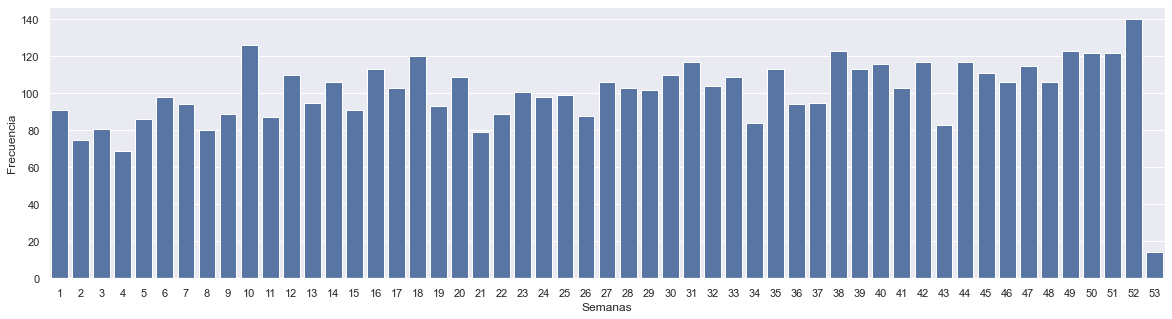

In [32]:
kl=pd.DataFrame(file["semana"].value_counts())
Indices_semanas = list(kl.index)
plt.figure(figsize=(20,5))
Ds=sns.barplot(x=Indices_semanas, y=kl["semana"],color='b')
#Ds.set_xticklabels(Ds.get_xticklabels(),rotation=0,ha="right")
plt.xlabel("Semanas")
plt.ylabel("Frecuencia")
plt.savefig('Personas_respecto_semanas', dpi=300)
plt.show()

In [33]:
Data_uni_años_2010 = file[(file.uni_med == 1)&(file.year==2010)]
Data_uni_dias_2010 = file[(file.uni_med == 3)&(file.year==2010)]

Data_uni_años_2019 = file[(file.uni_med == 1)&(file.year==2019)] 
Data_uni_dias_2019 = file[(file.uni_med == 3)&(file.year==2019)]
a=list(Data_uni_años_2010["uni_med"]);aa=list(Data_uni_años_2010["year"])
b=list(Data_uni_dias_2010["uni_med"]);bb=list(Data_uni_dias_2010["year"])
c=list(Data_uni_años_2019["uni_med"]);cc=list(Data_uni_años_2019["year"])
d=list(Data_uni_dias_2019["uni_med"]);dd=list(Data_uni_dias_2019["year"])
Lista_full_uni =a+b+c+d
Lista_full_años=aa+bb+cc+dd
DataFrame_diferencia_años =pd.DataFrame((Lista_full_uni),columns=["Uni_med"])
DataFrame_diferencia_años["Año"]=Lista_full_años
DataFrame_diferencia_años["Uni_med"].value_counts()

1    1017
3       7
Name: Uni_med, dtype: int64

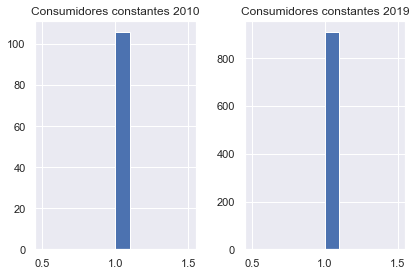

In [34]:
plt.subplot(1,2,1)
plt.hist(a);plt.title("Consumidores constantes 2010")

plt.subplot(1,2,2)
plt.hist(c);plt.title("Consumidores constantes 2019")
plt.tight_layout()
plt.savefig('Diferencia de personas constantes', dpi=300,bbox_inches='tight')
plt.show()

In [ ]:
datapie_NO = [len(Data_poblado[Data_poblado['Con o sin seguro'] == 'N']), len(Data_poblado[Data_poblado['Con o sin seguro'] == 'C']),
              len(Data_poblado_otros[Data_poblado_otros["Otros"]=="S"]),
             len(Data_poblado_otros[Data_poblado_otros["Otros"]=="I"]),
             len(Data_poblado_otros[Data_poblado_otros["Otros"]=="E"])]
labels_NO = ['No asegurados', 'Asegurados',"Subsidiado","Indeterminado","Especial"]
colors_NO = sns.color_palette('pastel')[0:9]
plt.pie(datapie_NO, labels=labels_NO, colors=colors_NO, autopct='%.3f%%', radius=1.5)
plt.savefig('Porcentaje_ss_poblado', dpi=300,bbox_inches='tight')
plt.show()